## Machine Learning

****

In [1]:
# statistical arrays
import numpy as np

#nureal networks
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt

C:\Users\elyn\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Single Nuron

***

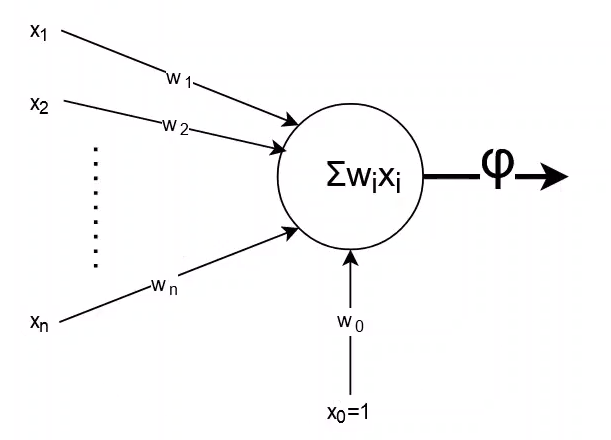

### Single Nuron input

***
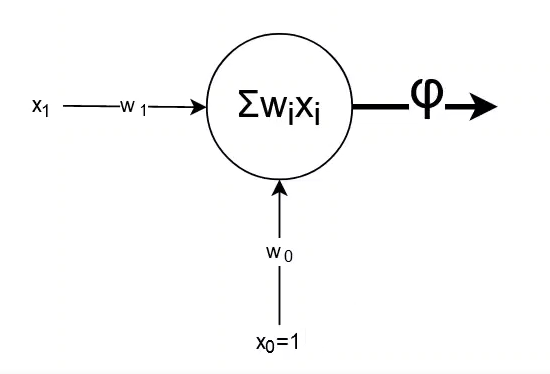



What I want to do here is take a single input (x1) and give an output (another number)based on the input.  
Similar to:  
$$y = mx + c$$


In [2]:
# Identity activation function
def ident(x):
    return x

In [3]:
# Firing a neuron.
def fire_nur(x, w, phi):
    return phi(np.sum(x * w))

In [4]:
# 1 * 2 + 3
x = np.array([1.0,4.0])
w = np.array([3.0, 2.0])

fire_nur(x, w, ident)

11.0

In [5]:
# X values - HAVE TO have 1.0 as index 0 
x = np.array([1.0,7.0])

# y values
w = np.array([5.0, 3.0])

# run function
fire_nur(x, w, ident)

26.0

## Supervised Learning

***

#### Create the data

In [6]:
# Real world input values
data_in = np.arange(1.0, 13.0, 1.0)

# check them out
data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [7]:
# Real world output values
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))

# check them out
data_out

array([ 3.16985754,  6.41369888, 13.57903   , 16.36086411, 17.97919481,
       23.05405979, 26.86261499, 32.08523285, 34.30022096, 40.08333773,
       45.07663414, 48.07824849])

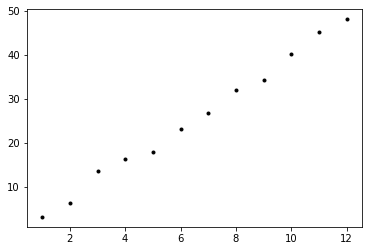

In [8]:
plt.plot(data_in, data_out, 'k.')

### Training the data

***

In [9]:
# index in the dataset
i = 5

In [10]:
# Actual input/output pair from real world data
data_in[i], data_out[i]

(6.0, 23.054059791984116)

In [11]:
# inital weights
w = np.array([0.0, 1.0])

# What the neuron currently outputs for the real world input - based on current weights
fire_nur(np.array([1.0, data_in[i]]), w, ident)



6.0

In [12]:
# Goal: Create an algorithm that updates w to move the output towards the real output

# inital weights
w = np.array([0.0, 4.0])

# What the neuron currently outputs for the real world input - based on current weights
fire_nur(np.array([1.0, data_in[i]]), w, ident)

24.0

### Cost

***

In [13]:
# cost function
def cost(w, h, phi, y):
    pred = fire_nur(x, w, phi)
    return (y - pred)**2

In [14]:
# index in the dataset
i = 5

In [15]:
w = np.array([0.0, 1.0])
cost(w, data_in[i], ident, data_out[i])

257.7328358046011

In [16]:
w = np.array([0.0, 3.5])
cost(w, data_in[i], ident, data_out[i])

2.0907430851570177

## Training

***
    

In [17]:
# Hyper-parameter
learning_rate = 0.001

In [18]:
def train_neuron(x, y, w, phi):
    # possible ajustments to the weights
    adj = np.array([0.0, learning_rate])
    # calculate the current costs
    current = cost (w, x, phi, y)
    # calculate the cost with the slight adjustment to the weights
    adding = cost(w + adj, x, phi, y)
    # subtracting = cost(w - adj, x, phi, y) 
    # if the adjusted weights lower the cost, update the weights
    if adding < current:
        w = w + adj
    # otherwise move in the other direction
    else:
        w = w - adj
    return w

In [19]:
# set the weights
w = np.array([0.0, 1.0])

In [20]:
# The training values
data_in[i], data_out[i]

(6.0, 23.054059791984116)

In [21]:
# Cureent neuron output for data in i
fire_nur(np.array([1.0, data_in[i]]), w, ident)

6.0

In [22]:
# nudge the weights towards the best values
w_improved = train_neuron(data_in[i], data_out[i], w, ident)
w_improved

array([0.   , 1.001])

In [23]:
# Cureent neuron output for data in i
fire_nur(np.array([1.0, data_in[i]]), w_improved, ident)

6.005999999999999

In [24]:
# set the weights
w = np.array([0.0, 1.0])

# loop for training
for epoch in range(300):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, ident)
        
# show w
w

array([0.   , 2.688])

# Using Keras



***


In [25]:
# Create a bew sequential neural network  
model = keras.Sequential()

In [26]:
# add a dense layer with 64 neurons and ise the relu activation function
model.add(keras.layers.Dense(units = 64, activation = 'relu'))

In [27]:
# add a dens layer with 10 neurons and uses the softmax activation function
model.add(keras.layers.Dense(units=10, activation = 'softmax'))

In [28]:
# Compile the neural network
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [29]:
# Create a training data set
x_train = np.random.normal(0.0, 1.0, (100, 64))
y_train = np.random.normal(0.5, 0.1, (100, 10))


In [30]:
# x_train and y_train are Numpy arrays.
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 0s 0s/step - loss: 13.3271 - accuracy: 0.0700
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 13.2530 - accuracy: 0.0700
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 13.1961 - accuracy: 0.0800
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 13.1466 - accuracy: 0.0800
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 13.1092 - accuracy: 0.0800


In [31]:
# Create a test data set
x_test = np.random.normal(0.0, 1.0, (10, 64))
y_test = np.random.normal(0.5, 0.1, (10, 10))


In [32]:
# Evaluate the network
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 89ms/step - loss: 14.3493 - accuracy: 0.0000e+00


In [33]:
# Make predictions for the test set
classes = model.predict(x_test, batch_size=128)

1/1 [==============================] - 0s 52ms/step


In [34]:
classes

array([[0.01879175, 0.0688303 , 0.02565434, 0.04058055, 0.25148612,
        0.18202356, 0.15743595, 0.02583154, 0.20776792, 0.02159804],
       [0.03831524, 0.07868624, 0.04516804, 0.09996152, 0.04362746,
        0.25702935, 0.08295025, 0.1928467 , 0.11166862, 0.04974655],
       [0.01047722, 0.10107528, 0.07244664, 0.00589645, 0.2683119 ,
        0.03719676, 0.10309737, 0.2769974 , 0.06824464, 0.0562563 ],
       [0.01106059, 0.15227339, 0.03714208, 0.02263547, 0.12948687,
        0.14690466, 0.10093799, 0.2801748 , 0.11174298, 0.00764125],
       [0.17716084, 0.07294266, 0.17095248, 0.07001358, 0.12602043,
        0.03232586, 0.16746801, 0.04063106, 0.12521464, 0.01727039],
       [0.06208008, 0.08267447, 0.04741779, 0.0124547 , 0.03464187,
        0.14909424, 0.23329872, 0.12103882, 0.23004659, 0.0272528 ],
       [0.06910396, 0.0186607 , 0.02228679, 0.00317059, 0.03039985,
        0.0192866 , 0.0237183 , 0.01821511, 0.78635174, 0.00880636],
       [0.36030692, 0.04386168, 0.0516375

## Single neuron in keras

***

In [35]:
# Create a bew sequential neural network  
model = keras.Sequential()

In [36]:
# add a dense layer with 64 neurons and ise the relu activation function
model.add(keras.layers.Dense(units = 64, activation = 'relu'))

In [37]:
# add a dense layer with 1 neuron
model.add(keras.layers.Dense(units=1))

In [38]:
# Compile the neural network
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

In [39]:
# Real world input values
data_in = np.arange(1.0, 13.0, .01)

data_in = data_in.reshape(-1, 1)

# check them out
data_in

array([[ 1.  ],
       [ 1.01],
       [ 1.02],
       ...,
       [12.97],
       [12.98],
       [12.99]])

In [40]:
# Real world output values
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, data_in.shape)

# check them out
data_out

array([[ 5.09414257],
       [ 2.42734313],
       [ 4.88795877],
       ...,
       [50.5864554 ],
       [51.48199319],
       [52.82418582]])

In [41]:
# Train the neural network

model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
38/38 [==============================] - 0s 1ms/step - loss: 656.2492 - accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 0s 891us/step - loss: 289.7514 - accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 0s 875us/step - loss: 213.4890 - accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 0s 713us/step - loss: 197.1134 - accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 0s 508us/step - loss: 193.8284 - accuracy: 0.0000e+00


In [42]:
# Test Set of values - input
data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed in the values to neural network
preds = model.predict(data_test)

32/32 [==============================] - 0s 725us/step


<function matplotlib.pyplot.show(close=None, block=None)>

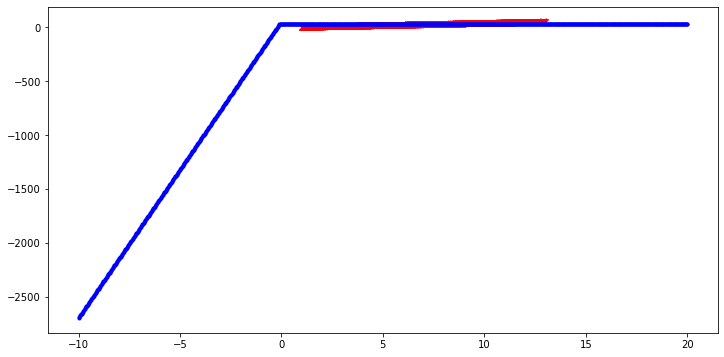

In [43]:
# Plot the values
fig, ax = plt.subplots(figsize = (12, 6))

# Plot the original data set
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label = 'Training')

# Plot the original data set
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label = 'Predictions')

plt.show